In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style="whitegrid")

In [107]:
sns.reset_defaults()

In [21]:
xy = [(-3,+1),(-2,+1),(-1,-1),(0,+1),(1,-1),(2,+1),(3,+1)]
x = np.array(list(map(lambda fst: fst[0], xy)))
y = np.array(list(map(lambda fst: fst[1], xy)))

In [22]:
def phi(x):
    return (-8/3)*(x**2) + (2/3)*(x**4)
x_trans = np.array(list(map(phi, x)))

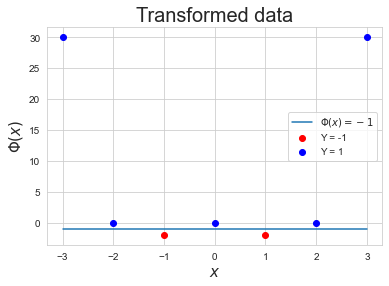

In [23]:
w = np.array([[1],[10]])
phi = np.array([x, x_trans])

np.dot(w.T, phi)

fig, ax = plt.subplots()
color_dict = {1:'b', -1: 'r'}
lab_dict = {1:"Y = 1", -1: "Y = -1"}
def swapfor(mapping, ls2):
    return [mapping[el2]for el2 in ls2]

for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(x[i], x_trans[i], c=color_dict[g], label=lab_dict[g])


linex = np.linspace(-3, 3, 100)
liney = np.ones(len(linex))*-1
ax.plot(linex, liney, label=r"$\Phi(x) = -1$");
ax.legend()
ax.set_ylabel(r'$\Phi(x)$', fontsize=15)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_title('Transformed data', fontsize=20)

plt.show()

In [7]:
# pics = np.load("data/images.npy", allow_pickle=False)
small_dataset = np.load("data/small_dataset.npy")
# small_labels = np.load("data/small_dataset_labels.npy").astype(int)
large_dataset = np.load("data/large_dataset.npy")
test_data = np.load("P2_Autograder_Data.npy")

In [14]:
def disp(array):
    plt.figure()
    plt.imshow(array.reshape(28,28), cmap='Greys_r')
    plt.show()

In [18]:
class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
    
    def __make_one_hot(self, array):
        one_hot = np.zeros(array.shape)
        min_pos = np.array([np.argmin(row) for row in array])
        one_hot[np.arange(array.shape[0]), min_pos] = 1
        return one_hot 

    def __distance(self, p1, p2):
        # calulate the l2 distance between points, i.e. euclidean
        # each is a 1xD matrix
        return sum(pow(p1-p2, 2))
       
    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        # 1 Find the cluster centers (cluster mean)
        def cluster_mean(resp, data):
            # for each datapoint in cluster c,
            # sum it's vals and divide by number in class
            class_sums = np.zeros((resp.shape[1], data.shape[1]))
            for point, res in zip(data, resp):
                class_sums[np.argmax(res)] += point
            # count up the number of datapoints in each class    
            class_counts = np.sum(resp, axis=0)
            
            # class_mean = np.divide(class_sums, class_counts)
            class_mean = []
            for class_sum, class_count in zip(class_sums, class_counts):
                class_mean.append(np.divide(class_sum, class_count))
                
            class_mean = np.array(class_mean)
            return class_mean 

        # 2 adjust reponsibility vectors
        def adjust_resp(mu, data):
            # resp dims: NxC
            # mu dims:
            positions = []
            for point in data:
                distances = []
                for class_mean in mu:
                    distances.append(self.__distance(class_mean, point))
                one_ht = np.zeros(mu.shape[0])
                one_ht[np.argmin(distances)] = 1
                positions.append(one_ht)
                
            return np.array(positions)

        # 3 calculate the loss
        def loss_func(data, mu, resp):
            loss_list = []
            # Loop through each datapoint in the dataset
            for datapoint, res in zip(data, resp):
                cluster = np.argmax(res)
                loss_list.append(self.__distance(datapoint, mu[cluster]))
            return sum(loss_list)

        # initialisation of cluster asignment i.e. responsibility vectors
        self.resp = self.__make_one_hot(np.random.randn(X.shape[0], self.K))
        # Set inital mu
        self.mu = np.random.randn(self.K, X.shape[1])
        self.loss_list = []

        # record the losses at each epoch
        converge = False
        epoch = 0
        while not converge:
            # 1 calc the mean of the clusters
            self.mu = cluster_mean(self.resp, X)
            
            # 2 Calc the loss
            current_loss = loss_func(X, self.mu, self.resp)

            # 3 adjust the responsibility vectors
            new_resp = adjust_resp(self.mu, X)
            if np.array_equal(new_resp, self.resp):
                converge = True
            self.resp = new_resp
            epoch += 1
            self.loss_list.append(current_loss)
#             print("Epoch:", epoch)

    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        return self.mu

In [ ]:
KMeansClassifier = KMeans(K=10)
KMeansClassifier.fit(large_dataset)

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.array(KMeansClassifier.loss_list));
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Iterations', fontsize=15)
ax.set_title('K-means objective function', fontsize=20)
plt.show()

In [ ]:
for cls in KMeansClassifier.mu:
    disp(cls)

Run K-means for 5 different restarts for different values of K = 5,10,20. Make a plot of the final K-means objective value after your algorithm converges (y-axis) v. the values of K (x-axis), with each data point having an error bar. To compute these error bars, you will use the 5 final objective values from the restarts for |each K to calculate a standard deviation for each K.
How does the final value of the objective function and its standard deviation change with K? (Note: Our code takes 10 minutes to run for this part.)

In [3]:
save_kmcs = []

In [19]:
for k in [5,10,20]:
    for restart in range(5):
        KMC = KMeans(K=k)
        KMC.fit(large_dataset)
        save_kmcs.append(KMC)
        print("Converged1!")

Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!
Converged1!


In [48]:
fllossls = []

for kmc in save_kmcs:
    fllossls.append(kmc.loss_list[-1])


In [51]:
lossls = fllossls[5:]

array([[1.42410798e+10, 1.40577714e+10, 1.40582114e+10, 1.40577433e+10,
        1.42416824e+10],
       [1.26501354e+10, 1.26915306e+10, 1.27962506e+10, 1.27684901e+10,
        1.26502263e+10],
       [1.12772526e+10, 1.13477094e+10, 1.12914389e+10, 1.12193198e+10,
        1.13084271e+10]])

In [123]:
sns.set_style(style="whitegrid")

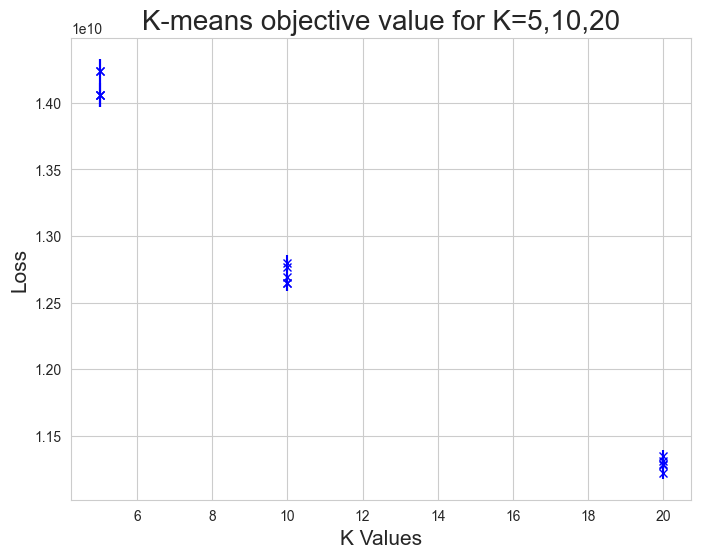

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

los = np.array(lossls).reshape(3,5)
klis = [5,10,20]

for num,ls in enumerate(los):
    x = klis[num]
    stdev = np.std(ls)
    for y in ls:
#         ax.scatter(x, y, color='b', marker="x")
        plt.errorbar(x, y, yerr=stdev, color='b', fmt='x')
    
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('K Values', fontsize=15)
ax.set_title('K-means objective value for K=5,10,20', fontsize=20)
plt.show()

In [41]:
import pickle
with open('plswrk3.pkl', 'wb') as f:
    pickle.dump([save.mu for save in save_kmcs], f)

In [33]:
with open('plswrk.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

For K = 10 and for 3 random restarts, show the mean image (aka the centroid) for each cluster. To render an image, use the pyplot imshow function. There should be 30 total images. Include all of these images as part of a single plot; your plot must fit on one page.

In [86]:
adapt_kmcs = save_kmcs[10:13]

In [87]:
[kmcs.loss_list[-1] for kmcs in adapt_kmcs]

[12650135437.432972, 12691530590.167019, 12796250587.160673]

In [88]:
imgs= []
for kmc in adapt_kmcs:
    for img in kmc.mu:
        imgs.append(img)

In [89]:
len(imgs)

30

In [125]:
def reshuffle(arr):
    nw = []
    for a,b,c in zip(arr[:10], arr[10:20], arr[20:30]):
        nw.append(a)
        nw.append(b)
        nw.append(c)
    return nw

In [126]:
nw_imgs = reshuffle(imgs)

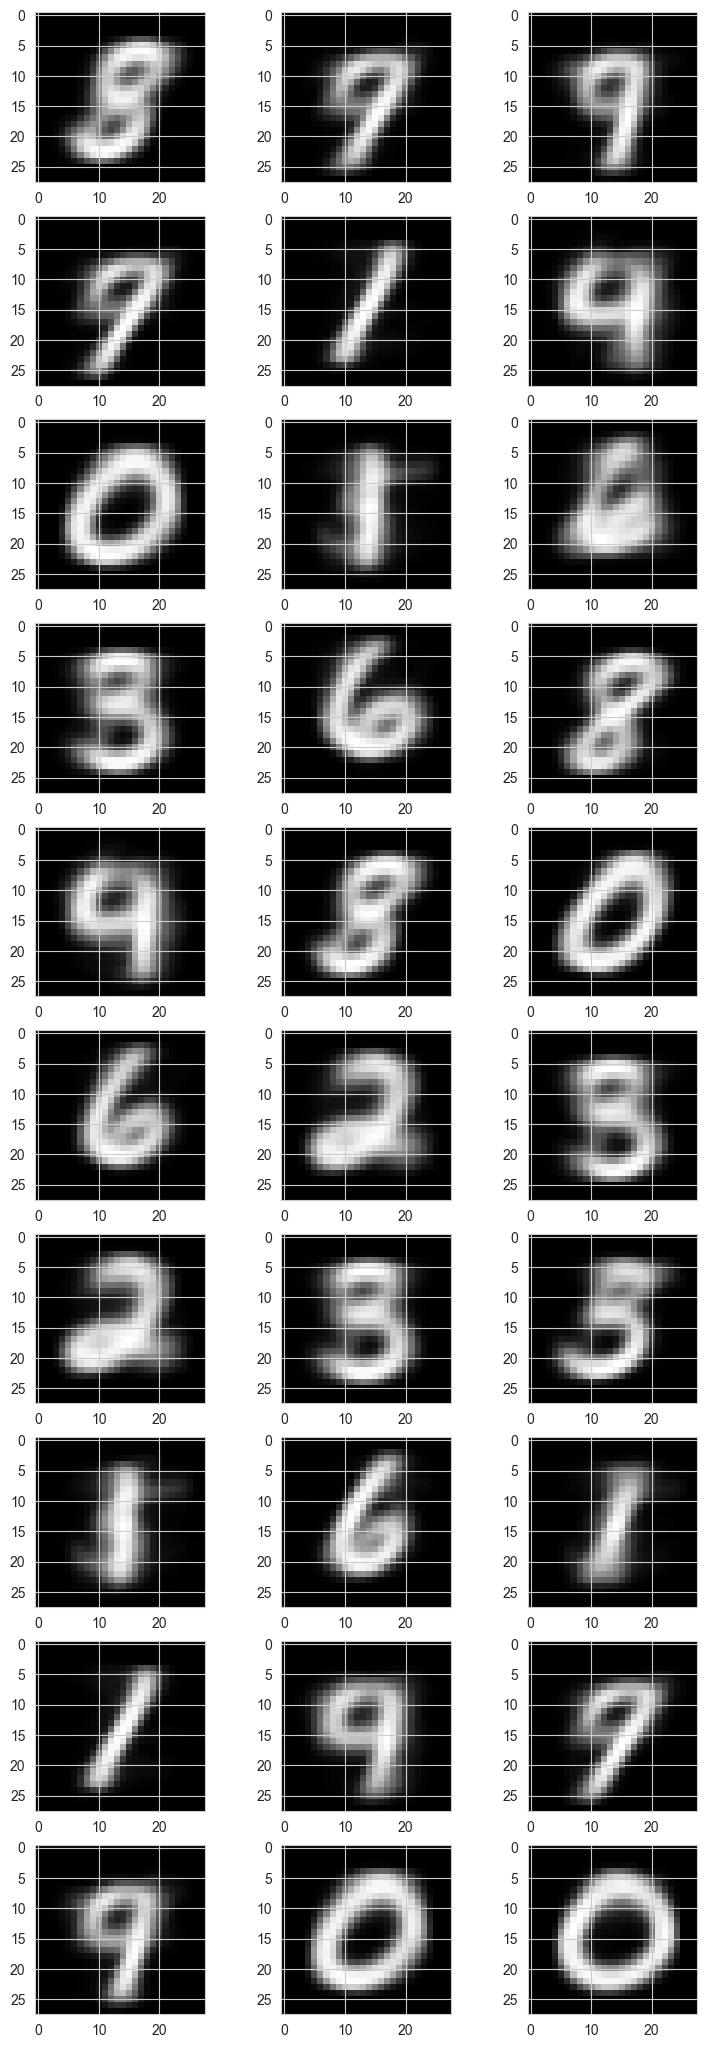

In [127]:
w = 28
h = 28
fig = plt.figure(figsize=(9, 26))
columns = 3
rows = 10
# ax enables access to manipulate each of subplots
ax = []
for i in range(columns*rows):
    img = nw_imgs[i].reshape(28,28)
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(img, cmap='Greys_r')

plt.show()  # finally, render the plot

In [128]:
small_dataset = np.load("data/small_dataset.npy")
small_labels = np.load("data/small_dataset_labels.npy").astype(int)

In [129]:
small_dataset.shape

(300, 784)

In [130]:
KMC = KMeans(K=10)
KMC.fit(small_dataset)

In [155]:
re = KMC.resp

In [156]:
re.shape

(300, 10)

In [157]:
classes = [np.argmax(row) for row in re]

In [173]:
classes

[7,
 7,
 7,
 7,
 5,
 5,
 7,
 5,
 7,
 7,
 7,
 5,
 7,
 5,
 5,
 4,
 7,
 5,
 5,
 7,
 0,
 5,
 5,
 4,
 4,
 5,
 0,
 4,
 5,
 5,
 9,
 9,
 9,
 9,
 9,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 4,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 7,
 4,
 4,
 0,
 2,
 7,
 4,
 9,
 2,
 2,
 7,
 2,
 3,
 9,
 7,
 2,
 0,
 2,
 0,
 4,
 0,
 9,
 0,
 3,
 2,
 0,
 0,
 0,
 7,
 7,
 4,
 7,
 4,
 4,
 7,
 4,
 4,
 4,
 4,
 7,
 7,
 4,
 7,
 4,
 4,
 7,
 7,
 7,
 4,
 7,
 7,
 7,
 4,
 7,
 7,
 2,
 4,
 7,
 2,
 1,
 2,
 6,
 9,
 6,
 2,
 1,
 0,
 1,
 6,
 1,
 1,
 1,
 1,
 6,
 9,
 1,
 2,
 1,
 6,
 6,
 2,
 6,
 1,
 1,
 6,
 6,
 1,
 6,
 7,
 3,
 3,
 3,
 3,
 3,
 9,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 8,
 3,
 4,
 3,
 4,
 3,
 0,
 4,
 3,
 5,
 4,
 7,
 4,
 3,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 6,
 6,
 6,
 1,
 1,
 6,
 1,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 2,
 9,
 1,
 1,
 6,
 6,
 6,
 1,
 1,
 6,
 6,
 6,
 6,
 1,
 8,
 8,
 8,
 4,
 8,
 8,
 8,
 8,
 8,
 8,


In [164]:
def confus(data,labels):
    confusion = np.zeros(100).reshape(10,10)
    for cluster, label in zip(data,labels):
        confusion[cluster, label] += 1
    return np.array(confusion)

In [169]:
con = confus(classes, small_labels)

In [170]:
df = pd.DataFrame(data=con)

In [171]:
df

,0,1,2,3,4,5,6,7,8,9
0,2.0,0.0,8.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,12.0,0.0,0.0,15.0,0.0,9.0
2,0.0,0.0,9.0,1.0,5.0,0.0,0.0,1.0,0.0,2.0
3,0.0,1.0,2.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0
4,4.0,1.0,4.0,13.0,0.0,9.0,1.0,0.0,7.0,2.0
5,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,10.0,0.0,0.0,13.0,1.0,17.0
7,11.0,0.0,4.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,0.0
9,0.0,28.0,3.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0


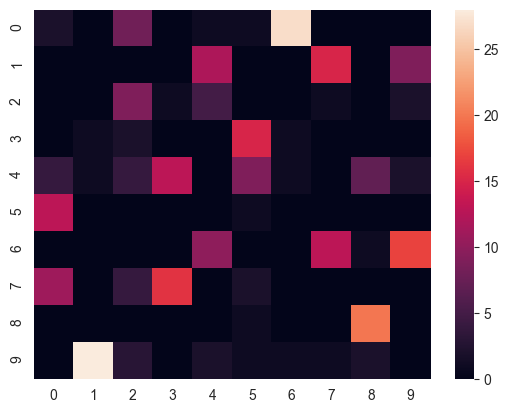

In [172]:
con = confus(classes, small_labels)
df = pd.DataFrame(data=con)
ax = sns.heatmap(df)